Converting xlsx file into csv file

In [ ]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')

def csv_from_xlsx(data_path, sheetname):
  xls = pd.read_excel(data_path, sheetname, index_col=None)
  csv_file = xls.to_csv("data.csv", encoding='utf-8')
  return csv_file

data = '/content/drive/My Drive/FG_DATA/2021_TAIN_II_DATA.xlsx'

csv_from_xlsx(data, 'PSP TEAK 2021 VI')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('data.csv')

df.head()

<ipython-input-3-3457f1057b7f>:1: DtypeWarning: Columns (2,5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv')


,Unnamed: 0,No.,Day,Month,Year,Planting Year,Measuring moment,Monitoring Team,Block,Plot Number,...,Fire Scars,Beetle,Erosion,Tree Number,Height,DBH,H/D,Remarks,Match,Test
0,0,1,3,2,2021,2018,1,"Belinda, Augustine, Kate, Cynaida",A52,865,...,No,No,No,1.0,6.5,6.3,1.031746,NaN,NaN,True
1,1,2,3,2,2021,2018,1,"Belinda, Augustine, Kate, Cynaida",A52,865,...,No,No,No,2.0,6.25,6.6,0.946970,NaN,NaN,True
2,2,3,3,2,2021,2018,1,"Belinda, Augustine, Kate, Cynaida",A52,865,...,No,No,No,3.0,2.75,3,0.916667,NaN,NaN,True
3,3,4,3,2,2021,2018,1,"Belinda, Augustine, Kate, Cynaida",A52,865,...,No,No,No,4.0,5.5,7.3,0.753425,NaN,NaN,True
4,4,5,3,2,2021,2018,1,"Belinda, Augustine, Kate, Cynaida",A52,865,...,No,No,No,5.0,4.25,5.3,0.801887,NaN,NaN,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67797 entries, 0 to 67796
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        67797 non-null  int64  
 1   No.               67797 non-null  int64  
 2   Day               67797 non-null  object 
 3   Month             67797 non-null  int64  
 4    Year             67797 non-null  int64  
 5   Planting Year     67797 non-null  object 
 6   Measuring moment  67797 non-null  int64  
 7   Monitoring  Team  67797 non-null  object 
 8   Block             67797 non-null  object 
 9   Plot Number       67797 non-null  object 
 10  Slope             67797 non-null  int64  
 11  Diseases          67797 non-null  object 
 12  Fire Scars        67797 non-null  object 
 13  Beetle            67797 non-null  object 
 14  Erosion           67797 non-null  object 
 15  Tree Number       67797 non-null  float64
 16  Height            67797 non-null  object

In [ ]:
test_data = df[['No.', ' Year', 'Planting Year', 'Block', 'Height', 'DBH']]
test_data.head()

,No.,Year,Planting Year,Block,Height,DBH
0,1,2021,2018,A52,6.5,6.3
1,2,2021,2018,A52,6.25,6.6
2,3,2021,2018,A52,2.75,3
3,4,2021,2018,A52,5.5,7.3
4,5,2021,2018,A52,4.25,5.3


In [ ]:
check_for_null = test_data.isnull().any()
print(check_for_null)

No.              False
 Year            False
Planting Year    False
Block            False
Height           False
DBH              False
dtype: bool


DROP 'DEAD' VALUES FROM THE DATASET

In [ ]:
test_data = test_data.drop(test_data[test_data['DBH'] == 'dead'].index)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38852 entries, 0 to 67793
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   No.            38852 non-null  int64 
 1    Year          38852 non-null  int64 
 2   Planting Year  38852 non-null  object
 3   Block          38852 non-null  object
 4   Height         38852 non-null  object
 5   DBH            38852 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.1+ MB


### convert the 'Height' and 'DBH' features from object type to float type

In [ ]:
test_data['Height'] = test_data['Height'].apply(float)
test_data['DBH'] = test_data['DBH'].apply(float)

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38852 entries, 0 to 67793
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No.            38852 non-null  int64  
 1    Year          38852 non-null  int64  
 2   Planting Year  38852 non-null  object 
 3   Block          38852 non-null  object 
 4   Height         38852 non-null  float64
 5   DBH            38852 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 2.1+ MB


Compute for volume = pi * r 2 * h

In [ ]:
import numpy as np

test_data['Volume'] = np.pi * (test_data['DBH']/100)**2 * test_data['Height']
test_data.describe()


,No.,Year,Height,DBH,Volume
count,38852.000000,38852.0,38852.000000,38852.000000,38852.000000
mean,33069.252342,2021.0,9.848515,11.487884,0.637131
std,19658.138086,0.0,4.165121,5.364103,0.624816
min,1.000000,2021.0,0.300000,0.000000,0.000000
25%,16070.750000,2021.0,6.250000,6.900000,0.092913
50%,32427.500000,2021.0,10.500000,12.000000,0.487174
75%,49945.500000,2021.0,13.250000,15.600000,1.004976
max,67875.000000,2021.0,21.750000,34.100000,7.009270


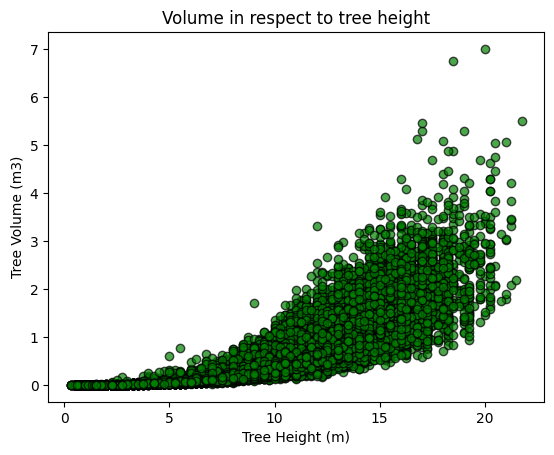

In [ ]:
import matplotlib.pyplot as plt
tree_heights = test_data['Height']
tree_volumes = test_data['Volume']

plt.scatter(tree_heights, tree_volumes, color='green', alpha=0.7, edgecolors='black')
plt.xlabel('Tree Height (m)')
plt.ylabel('Tree Volume (m3)')
plt.title('Volume in respect to tree height')

plt.show()

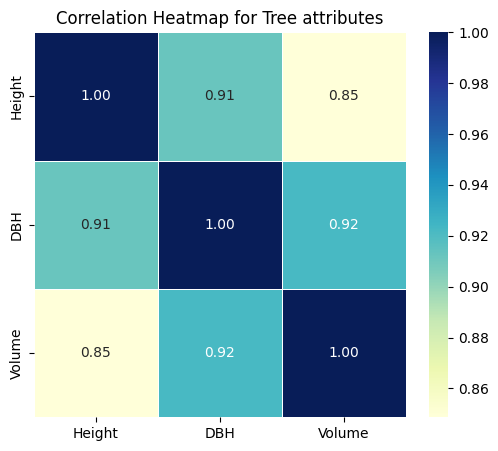

In [ ]:
import seaborn as sns

corr_matrix = test_data[['Height', 'DBH', 'Volume']].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap for Tree attributes")

plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = test_data[['Height', 'DBH']]
y = test_data['Volume']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)


In [ ]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error: 0.0001482531719124672
R2 Score: 0.9996154260652395


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


In [ ]:
#drive.mount('/content/drive')

sample_data = '/content/drive/My Drive/FG_DATA/PSP_DATA.xlsx'
xls = pd.read_excel(sample_data, 'AKUMANDAN_DATA', index_col=None)
xls.to_csv('rsv.csv', encoding='utf-8')

res = pd.read_csv('rsv.csv')
res.head()


,Unnamed: 0,No.,PLOT NO.,BLOCK NO.,PLANTING YEAR,DAY,MONTH,YEAR,TEAM LEADER,PLOT RADIUS(m),...,TREE NUMBER,TREE HEIGHT(M),DBH(CM),COPPICE?,WILDLING?,TREE DIE BACK?,BEETLE INFESTATION,REMARKS,H/D,MATCH
0,0,1,665,1A,2001,20,1,2021,"Alex,Sammy,John,Confort",15.96,...,1,23.00,37.2,NaN,NaN,NaN,NaN,NaN,0.618280,47.0
1,1,2,665,1A,2001,20,1,2021,"Alex,Sammy,John,Confort",15.96,...,2,22.75,30.8,NaN,NaN,NaN,NaN,NaN,0.738636,47.0
2,2,3,665,1A,2001,20,1,2021,"Alex,Sammy,John,Confort",15.96,...,3,25.25,33.0,NaN,NaN,NaN,NaN,NaN,0.765152,47.0
3,3,4,665,1A,2001,20,1,2021,"Alex,Sammy,John,Confort",15.96,...,4,24.75,27.2,NaN,NaN,NaN,NaN,NaN,0.909926,47.0
4,4,5,665,1A,2001,20,1,2021,"Alex,Sammy,John,Confort",15.96,...,5,24.25,24.8,NaN,NaN,NaN,NaN,NaN,0.977823,47.0


In [ ]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15216 entries, 0 to 15215
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          15216 non-null  int64  
 1   No.                 15216 non-null  int64  
 2   PLOT NO.            15216 non-null  object 
 3   BLOCK NO.           15216 non-null  object 
 4   PLANTING YEAR       15216 non-null  int64  
 5   DAY                 15216 non-null  int64  
 6   MONTH               15216 non-null  int64  
 7   YEAR                15216 non-null  int64  
 8   TEAM LEADER         15216 non-null  object 
 9   PLOT RADIUS(m)      15216 non-null  float64
 10  SOIL EROSION        15216 non-null  object 
 11  SPECIES             836 non-null    object 
 12  COVER%              836 non-null    object 
 13  HEIGHT(CM)          835 non-null    object 
 14  SLOPE               111 non-null    float64
 15  TREE SPECIES        15216 non-null  object 
 16  TREE

In [ ]:
res = res[['No.', 'TREE HEIGHT(M)', 'DBH(CM)']]
res['Volume'] = np.pi * (res['DBH(CM)']/100)**2 * res['TREE HEIGHT(M)']

In [ ]:
res

,No.,TREE HEIGHT(M),DBH(CM),Volume
0,1,23.00,37.2,9.999162
1,2,22.75,30.8,6.780047
2,3,25.25,33.0,8.638516
3,4,24.75,27.2,5.752583
4,5,24.25,24.8,4.685597
...,...,...,...,...
15211,15760,13.50,12.4,0.652119
15212,15761,14.25,21.3,2.031066
15213,15762,16.00,20.3,2.071390
15214,15763,16.00,22.2,2.477284


In [ ]:
new_data[['Height', 'DBH']] = res[['TREE HEIGHT(M)', 'DBH(CM)']]

for_data = new_data[['Height', 'DBH']]
pr = rf.predict(for_data)
pr


array([6.42617662, 5.40788598, 6.42617662, ..., 2.0713118 , 2.47700409,
       0.94157773])

In [ ]:
np.pi

3.141592653589793